In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt 
import seaborn as sns     # MATLAB like plotting routines
import random                        # for generating random numbers
#
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
#
import pandas as pd
import tensorflow as tf
#
from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Flatten, Input, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


#
print(tf.__version__)

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used


from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils      

2.10.0


In [2]:
train_dir = "food_images/validation"
test_dir  = "food_images/evaluation"

target_size = (224,224)
batch_size = 1

In [3]:
# Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    vertical_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='sparse')

Found 3430 images belonging to 11 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='sparse')

Found 3347 images belonging to 11 classes.


In [5]:
labels = list(test_generator.class_indices.keys())
print(labels)

['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


In [38]:
train_images = np.zeros((len(train_generator),target_size[0],target_size[1],3))
y_train      = np.zeros((len(train_generator)))
for i in np.arange(0,len(train_generator)):
    train_images[i,:] = train_generator[i][0]
    y_train[i]        = int(train_generator[i][1])

test_images = np.zeros((len(test_generator),target_size[0],target_size[1],3))
y_test      = np.zeros((len(test_generator)))
for i in np.arange(0,len(test_generator)):
    test_images[i,:] = test_generator[i][0]
    y_test[i]        = int(test_generator[i][1])

In [7]:
test_images

array([[[[0.72941178, 0.43921572, 0.16078432],
         [0.76470596, 0.49019611, 0.21960786],
         [0.78823537, 0.52156866, 0.26666668],
         ...,
         [1.        , 0.64313728, 0.54509807],
         [1.        , 0.63529414, 0.55686277],
         [0.93725497, 0.55686277, 0.49019611]],

        [[0.77254909, 0.50588238, 0.25098041],
         [0.78823537, 0.53333336, 0.28235295],
         [0.78823537, 0.54509807, 0.30588236],
         ...,
         [0.96862751, 0.5529412 , 0.45882356],
         [1.        , 0.60784316, 0.52156866],
         [1.        , 0.61176473, 0.5411765 ]],

        [[0.81176478, 0.58039218, 0.35294119],
         [0.83529419, 0.60392159, 0.37647063],
         [0.83529419, 0.61960787, 0.40000004],
         ...,
         [0.9450981 , 0.4666667 , 0.38431376],
         [0.97647065, 0.53725493, 0.45098042],
         [1.        , 0.58823532, 0.50980395]],

        ...,

        [[0.61960787, 0.1137255 , 0.09019608],
         [0.62352943, 0.11764707, 0.09411766]

In [8]:
train_images = train_images.reshape(len(train_generator), target_size[0]*target_size[1]*3) # reshape to 2d array
test_images = test_images.reshape(len(test_generator), target_size[0]*target_size[1]*3) # reshape to 2d array

In [9]:
pca = PCA(n_components=2)
#scaler = StandardScaler()

X_train_pca = pca.fit_transform(train_images)
X_test_pca  = pca.transform(test_images)

#X_train_pca = scaler.fit_transform(X_train_pca)

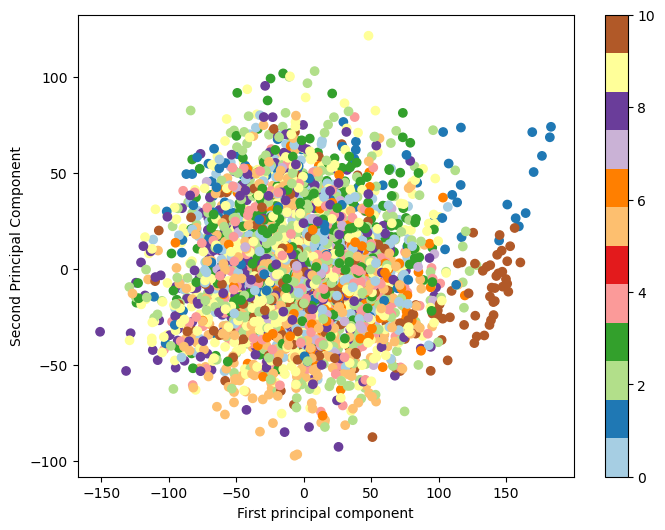

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
#sample_ind = np.random.choice(np.arange(0,len(X_train_pca)),1000)
#sample = X_train_pca[sample_ind,:]
char=ax.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')
fig.colorbar(char)

In [11]:
kmeans_pca = KMeans(n_clusters=10, random_state=0)
kmeans_pca.fit(X_train_pca)
test_pca = kmeans_pca.predict(X_test_pca)

C:\Users\jortega\Anaconda3\envs\python310PlanSemilla\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


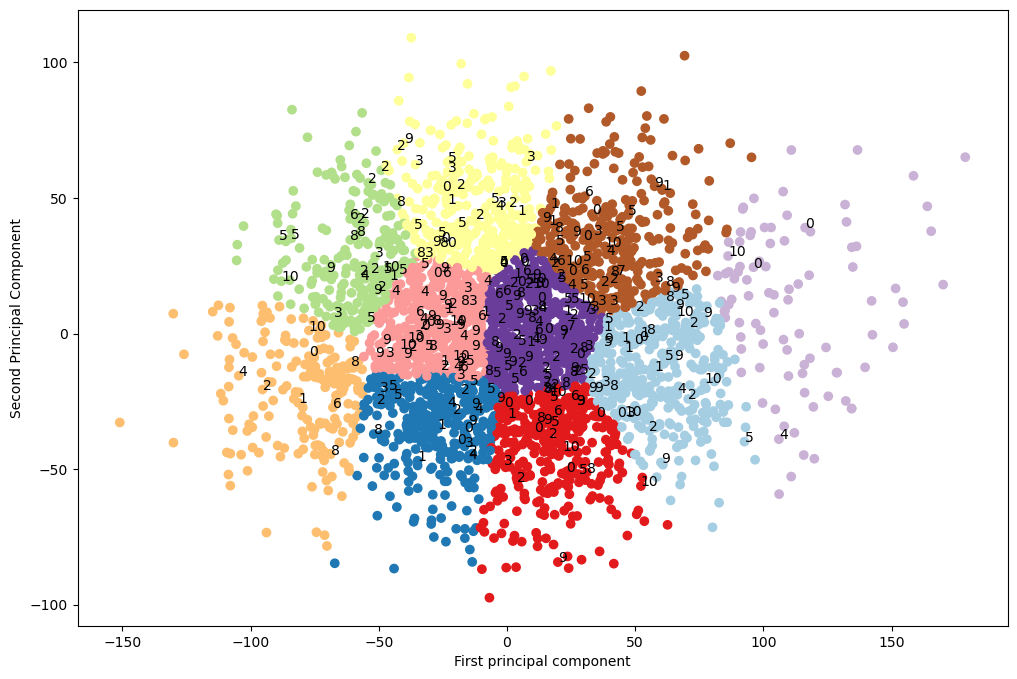

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
char=ax.scatter(X_test_pca[:,0],X_test_pca[:,1],c=test_pca,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')

for i, txt in enumerate(np.random.choice(y_test,300)):
    ax.annotate(int(txt), (X_test_pca[:,0][i], X_test_pca[:,1][i]))

In [14]:
embedding = MDS(n_components=2)
X_mds = embedding.fit_transform(train_images)
#X_test_mds = embedding.fit(test_images)
#X_transformed = scaler.transform(X_transformed)

C:\Users\jortega\Anaconda3\envs\python310PlanSemilla\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\jortega\Anaconda3\envs\python310PlanSemilla\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


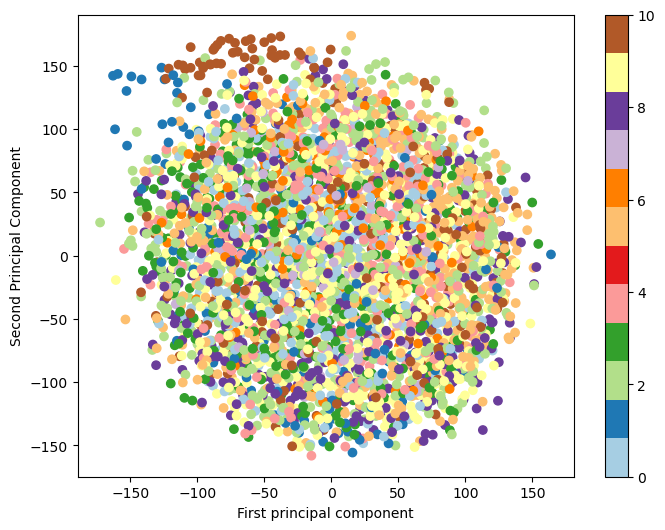

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
char=ax.scatter(X_mds[:,0],X_mds[:,1],c=y_train,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')
fig.colorbar(char)

In [21]:
kmeans_mds = KMeans(n_clusters=10, random_state=0)
kmeans_mds.fit(X_mds)
test_mds = kmeans_mds.predict(X_mds)

C:\Users\jortega\Anaconda3\envs\python310PlanSemilla\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


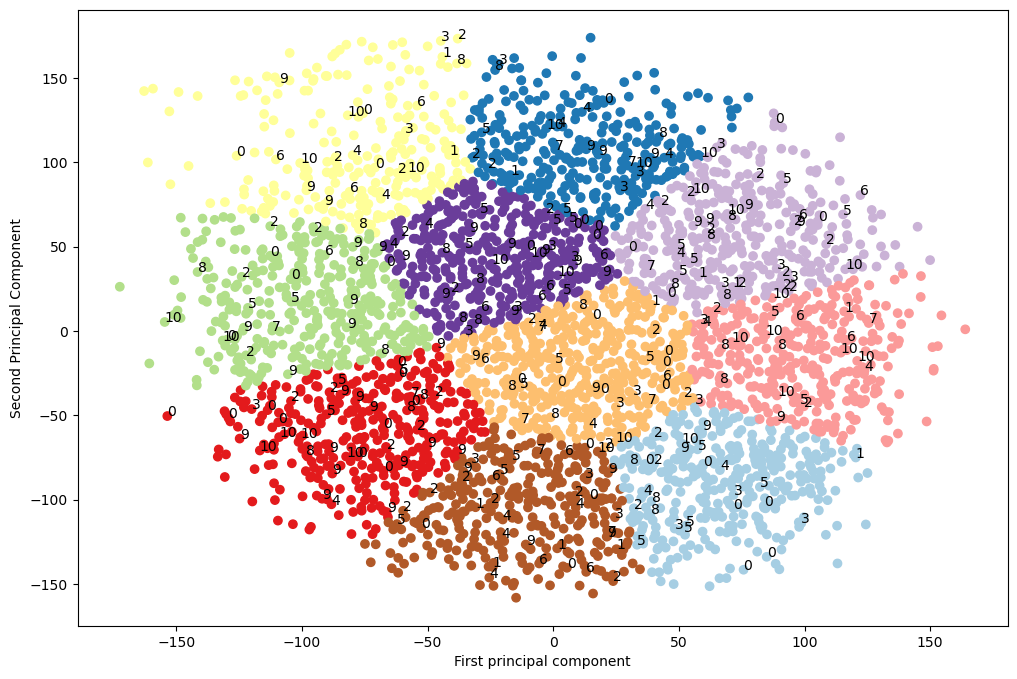

In [25]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
char=ax.scatter(X_mds[:,0],X_mds[:,1],c=test_mds,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')

for i, txt in enumerate(np.random.choice(y_train,300)):
    ax.annotate(int(txt), (X_mds[:,0][i], X_mds[:,1][i]))

In [31]:
X_tsne = TSNE(n_components=2, learning_rate='auto',
                  random_state=0,init='pca', perplexity=3).fit_transform(train_images)

In [36]:
np.shape(y_train)

(2401,)

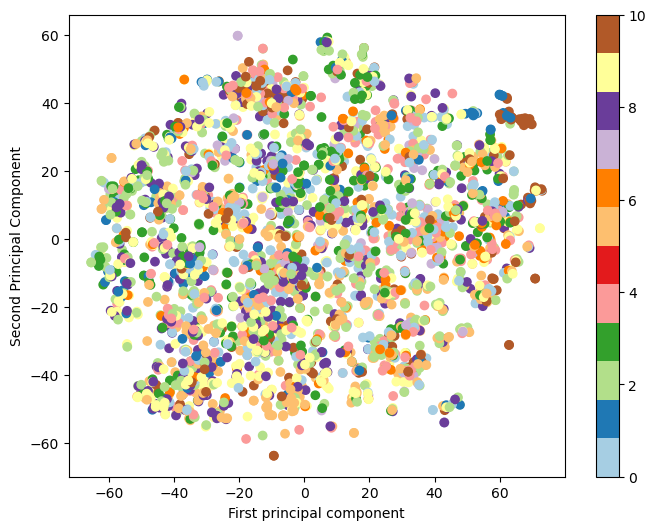

In [40]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
char=ax.scatter(X_tsne[:,0],X_tsne[:,1],c=y_train,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')
fig.colorbar(char)

In [41]:
kmeans_tsne = KMeans(n_clusters=10, random_state=0)
test_tsne = kmeans_tsne.fit_predict(X_tsne)

C:\Users\jortega\Anaconda3\envs\python310PlanSemilla\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


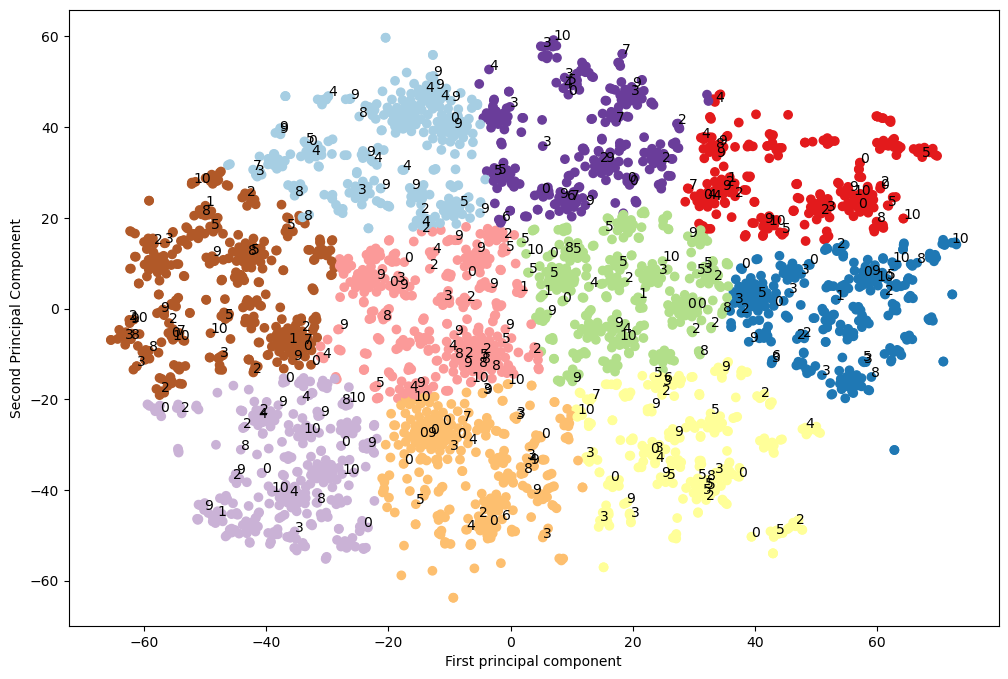

In [44]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
char=ax.scatter(X_tsne[:,0],X_tsne[:,1],c=test_tsne,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')

for i, txt in enumerate(np.random.choice(y_train,300)):
    ax.annotate(int(txt), (X_tsne[:,0][i], X_tsne[:,1][i]))